<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/185150400111053_Muhammad_Daffa_Arga_Project_Akhir_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir Pengantar Data Santis

# 185150400111053 - Muhammad Daffa Arga - SI-B

---



# Deskripsi Tujuan Bisnis
Video Game dirilis dalam beberapa platform yang berbeda, seperti pada Nintentdo, PS2, PS3, DS, Wii, dll. Video game tersebut juga memiliki data seperti genre game, nama publisher, tahun perilisan. Dalam dataset ini juga ditampilkan jumlah penjualan dalam beberapa wilayah, maka tujuan bisnis ini ialah untuk mengetahui beberapa yang terbaik sesuai dengan indikator (genre, platform, dll) karena data ini mencakup semua video game sejak video game tersebut dirilis.

# Analisa Pendekatan yang Akan Dilakukan
Pendekatan yang digunakan adalah pendekatan analisa kuantitatif, dimana dengan proses analisa dari beberapa jumlah video game dapat diketahui beberapa kategori yang terbaik diantara semua video game yang tersedia. 

# Pengumpulan Data
Pengumpulan data dilakukan dengan mengunduh dataset dari situs kaggle.com dengan berbagai kolom yang sudah tersedia datanya dengan judul "Video Game Sales"

# Pemahaman Terhadap Data yang Telah Dikumpulkan
Dataset yang diunduh memiliki jumlah data 16598 baris dan 11 kolom, dengan detail setiap kolom seperti berikut:

1. Rank : Peringkat game dari beberapa game yang ada
2. Year : Tahun rilis game tersebut
3. Nama : Nama dari game tersebut
4. Platform : Platform dari game tersebut
5. Genre : Genre dari game tersebut
6. Publisher : Pengembang/Perusahaan yang merilis game tersebut
7. NA_Sales : Jumlah penjualan di region NA
8. EU_Sales : Jumlah penjualan di region EU
9. JP_Sales : Jumlah penjualan di region JP
10. Other_Sales : Jumlah penjualan pada region selain NA, EU, dan JP
11. Global Sales : Jumlah penjualan dalam lingkup dunia













# Persiapan Data (Eksplorasi Data)

Langkah pertama yang dilakukan ialah mengimport library yang dibutuhkan seperti pandas untuk pemrosesan data, numpy untuk linear algebra.

In [ ]:
import numpy as np 
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly import express as px

from plotly.offline import init_notebook_mode,iplot
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

proses data collection dan import

In [ ]:
#membaca data menggunakan method read_csv()
data = pd.read_csv("vgsales.csv")

In [ ]:
#menampilkan bagian awal data
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#untuk mengetahui bagian akhir data
data.tail() 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
#melihat jumlah baris dan kolom
data.shape 

(16598, 11)

In [ ]:
#melihat kolom yang ada pada dataset
data.columns 

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

EKSPLORASI DATA DAN ANALISA

In [ ]:
#melihat deskripsi data
data.describe() 

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Dengan menggunakan method info() kita dapat mengetahui berbagai keadaan dari dataset kita, seperti tipe data, penggunaan memori, jumlah data yang kosong/null.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Sekarang, kita harus mengetahui mana kolom yang memiliki data bernilai NaN.

In [ ]:
data.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

Dari data diatas, diketahui bahwa pada kolom Year dan Publisher terdapat data dengan nilai NaN. Maka dari itu, kita harus mencari tahu berapa banyak data yang memiliki value NaN.

In [ ]:
(data.isna().sum() * 100) / data.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

Kita bisa mengetahui dari data diatas bahwa Year memiliki total 1.63% data yang hilang, dan Publisher memiliki total 0.34% data yang hilang.

Selanjutnya, kita akan menghapus data dengan nilai Nan.

In [ ]:
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Lalu, dilakukan pengisian data yang hilang pada kolom Year dan kolom Publisher

In [ ]:
data.Year = data.Year.fillna(data.Year.mean())

In [ ]:
#mengganti tipe data Year menjadi int32
data.Year = data.Year.astype('int32')
data.Year

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: int32

Disini, kolom Publisher merupakan kolom tipe Kategori, jadi kita harus mengisi data yang kosong dengan nilai yang sering berulang

Jadi, kita menggunakan metode value_counts() untuk mendapatkan nilai yang terus berulang.

In [ ]:
data.Publisher.value_counts(normalize=True)

Electronic Arts                 0.081681
Activision                      0.058948
Namco Bandai Games              0.056348
Ubisoft                         0.055683
Konami Digital Entertainment    0.050302
                                  ...   
Bomb                            0.000060
Glams                           0.000060
GOA                             0.000060
Westwood Studios                0.000060
DreamWorks Interactive          0.000060
Name: Publisher, Length: 578, dtype: float64

Untuk mengisi nilai yang kosong tersebut kita dapat menggunakan nilai 'Electronic Arts'.

In [ ]:
data.Publisher = data.Publisher.fillna(data.Publisher.mode()[0])

Kemudian, kita cek tipe data dari kedua kolom tersebut

In [ ]:
data[['Publisher','Year']].dtypes

Publisher    object
Year          int32
dtype: object

# Pemodelan Data

menampilkan platform terpopuler 

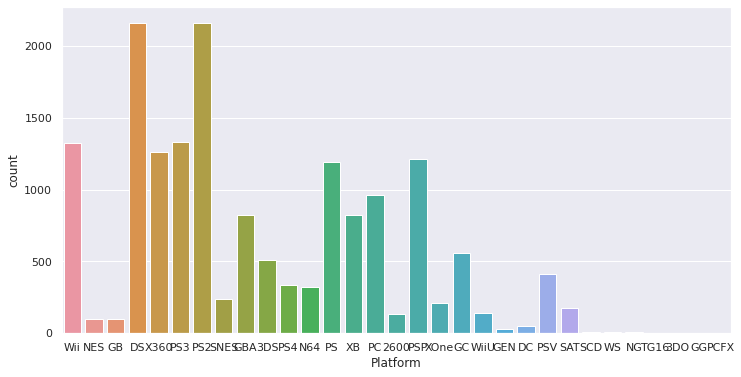

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Platform', data=data)

menampilkan genre terpopuler 

---



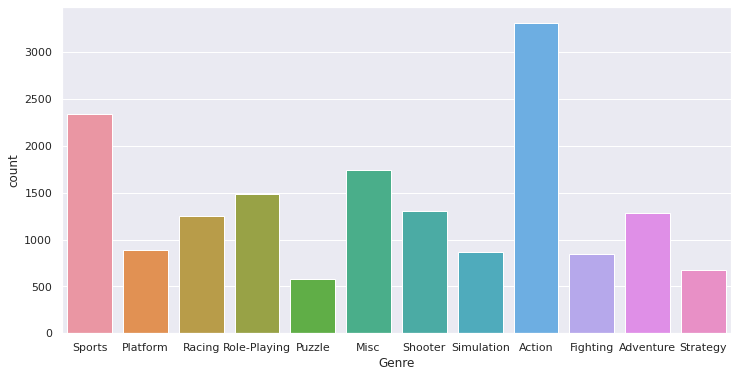

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Genre', data=data)

dari grafik diatas, dapat disimpulkan bahwa game dengan genre 'Action' merupakan genre terpopuler dari genre lainnya.

Kemudian, kita menampilkan heatmap diantara kolom dan baris

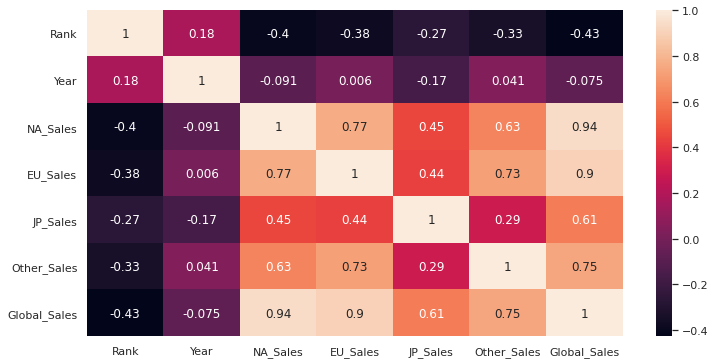

In [ ]:
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, annot=True)

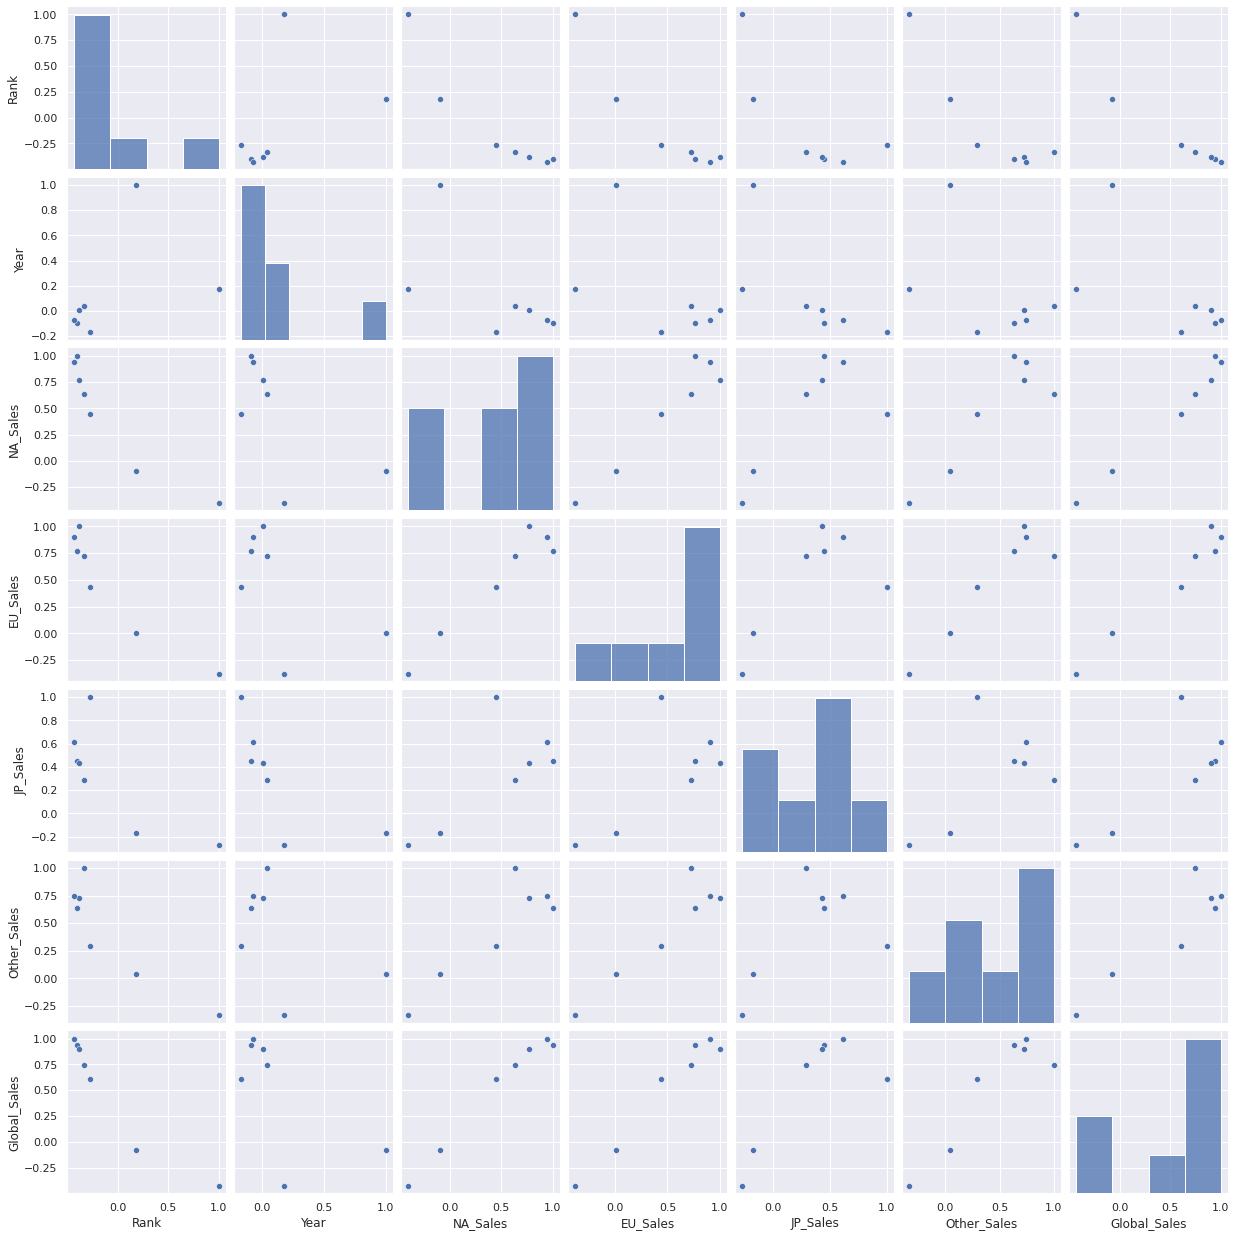

In [ ]:
sns.pairplot(data.corr())

Membandingkan penjualan berdasarkan Platform secara global tiap tahunnya

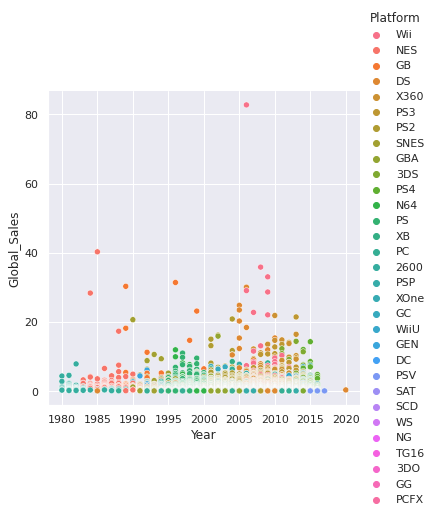

In [ ]:
sns.relplot(x='Year',y='Global_Sales', hue='Platform',data=data)

Membandingkan penjualan berdasarkan Genre secara global tiap tahunnya

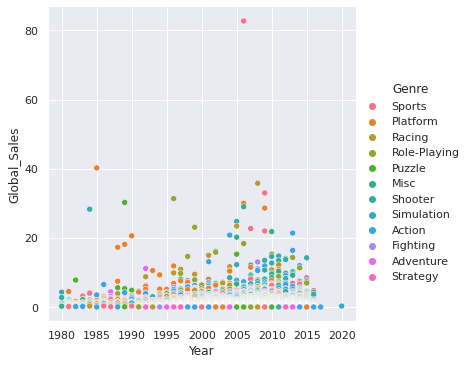

In [ ]:
sns.relplot(x='Year',y='Global_Sales', hue='Genre',data=data)

# Evaluasi Model

Setelah melakukan Pemodelan Data, kita mendapatkan kesimpulan sebagai berikut:
- Pada dataset, memiliki data sebanyak 16597 baris
- Dataset tersebut memiliki 11 kolom dengan isi yang berbeda-beda
- Dataset tersebut memiliki kolom Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales dengan penjelasannya yang berada di bagian awal
- Dataset memiliki data dengan tipe data float, int, dan object.
- Terdapat data kosong yang berada pada kolom Year dan Publisher.
- Setelah dijumlah, pada kolom Year memiliki data kosong sebanyak 271 baris dan pada kolom Publiher memiliki data kosong sebanyak 58 baris
- Pada data kosong kolom publisher, data kosong tersebut diisi dengan nilai 'Electronic Arts'
- Dalam analisanya, kita menganalisa data Platform yang terpopuler di dataset tersebut, didapat hasil bahwa platfrom DS dan platform PS2 merupakan platform terpopuler.
- Dalam analisanya, kita menganalisa data Genre yang terpopuler di dataset tersebut, didapat hasil bahwa genre Action merupakan genre yang terpoluler.
- Dalam penjualan secara global, Platform Wii merupakan platform dengan penjualan terbanyak pada tahun 2006. Ini membuktikan bahwa platform di tahun tersebut merupakan platform yang terpopuler.
- Dalam penjualan secara global, Genre Sport merupakan genre dengan penjualan terbanyak pada tahun 2006